In [50]:
import networkx as nx
import matplotlib.pyplot as plt

In [51]:
class Graph:
    def __init__(self, matr: list):
        self.graph = matr
        
    @classmethod
    def init_by_adjacency_list(cls, list1):
        x = cls(list1)
        return x
        
    @classmethod
    def init_by_adjacency_matrix(cls, matrix):
        graph = [[]]
        for i in range(len(matrix) - 1):
            graph.append([])
        for i in range(len(matrix)):
            for j in range(i):
                if matrix[i][j] == 1:
                    graph[i].append(j)
                    graph[j].append(i)
        x = cls(graph)
        return x
        
    @classmethod
    def init_by_incendent_matrix(cls, matrix):
        graph = [[]]
        for i in range(len(matrix) - 1):
            graph.append([])
        for i in range(len(matrix[0])):
            cnt = []
            for j in range(len(matrix)):
                if matrix[j][i] == 1:
                     cnt.append(j)
            cnt1 = cnt.pop()
            cnt2 = cnt.pop()
            graph[cnt1].append(cnt2)
            graph[cnt2].append(cnt1)
        x = cls(graph)
        return x
    
    @classmethod
    def init_by_edges_list(cls, list_pairs: list):
        edges = 0
        graph = []
        for i in range(len(list_pairs)):
            if list_pairs[i][0] > edges:
                edges = list_pairs[i][0]
            if list_pairs[i][1] > edges:
                edges = list_pairs[i][1]
        edges += 1
        for i in range(edges):
            graph.append([])
        for i in range(len(list_pairs)):
            graph[list_pairs[i][0]].append(list_pairs[i][1])
            graph[list_pairs[i][1]].append(list_pairs[i][0])
        x = cls(graph)
        return x
        
    def add_arc(self, u: int, v: int):
        self.graph[u].append(v)
        
    def del_arc(self, u: int, v: int):
        self.graph[u].pop(v)
    
    def add_vertex(self):
        self.graph.append(len(self.graph))
        
    def del_vertex(self, vertex: int):
        self.graph.pop(vertex)
        
        
    def get_graph_by_adjacency_list(self):
        return self.graph
    
    def get_graph_by_adjacency_matrix(self):
        matr = []
        for i in range(len(self.graph)):
            matr.append([])
            for j in range(len(self.graph)):
                matr[i].append(0)
            
        for i in range(len(self.graph) - 1):
            for j in range(len(self.graph[i])):
                matr[i][self.graph[i][j]] = 1
                matr[self.graph[i][j]][i] = 1
        return matr
    
    
    def get_graph_by_incendent_matrix(self):
        matr = []
        for i in range(len(self.graph)):
            matr.append([])
            for j in range(len(self.graph)):
                matr[i].append(0)
            
            
        for i in range(len(self.graph)):
            for j in range(len(self.graph[i]) - 1):
                matr[i][self.graph[i][j]] = 1
                
        return matr
    
    def find_medians(self):
        matr = self.get_graph_by_adjacency_matrix()
        matr_ways = []
        rez = []
        for i in range(len(matr)):
            for j in range(len(matr)):
                if matr[i][j] == 0:
                    matr[i][j] = len(matr) + 10

        for i in range(len(matr)):
             matr_ways.append([])
                
        for i in range(len(matr)):
            for j in range(len(matr)):
                matr_ways[i].append(j)
                    
        for i in range(len(matr)):
            for j in range(len(matr)):
                for k in range(len(matr)):
                    if matr[i][k] != (len(matr) + 10) and matr[k][j] != (len(matr) + 10) and matr[i][k] + matr[k][j] < matr[i][j]:
                        matr[i][j] = matr[i][k] + matr[k][j]
                        matr_ways[i][j] = matr_ways[i][k]
                        
                        
        minimum = len(matr) * len(matr)
        cnt = 0
        for i in range(len(matr)):
            for j in range(len(matr)):
                cnt += matr[i][j]
            if minimum > cnt:
                minimum = cnt
            cnt = 0
                    
        for i in range(len(matr)):
            for j in range(len(matr)):
                cnt += matr[i][j]
            if minimum == cnt:
                rez.append(i)
            cnt = 0
                
        return rez
    
    def get_graph_by_edges_list(self):
        matr = []
        for i in range(len(self.graph)):
            for j in range(len(self.graph[i])):
                matr.append((i, self.graph[i][j]))
        return matr
    
    def print_graph(graph):
        for line in graph:
            print(*line)
    
    def get_graph(self):
        return self.graph
        
    def __del__(self):
        print()

In [52]:
def draw_graph(graph, nodes = []):
    G = nx.Graph()
    for i in range(len(graph) - 1):
        G.add_node(i)
    for i in range(len(graph)):
        for j in range(len(graph[i])):
            G.add_edge(i, graph[i][j])
    nx.draw_shell(G, nlist=[range(len(graph)), range(len(graph))], with_labels=True, 
                  font_weight='bold', node_size = 1200)
    nx.draw_shell(G, nlist=[range(len(graph)), range(len(graph))], with_labels=True, nodelist = nodes, node_color="red",
                  font_weight='bold', node_size = 1200)

In [94]:
def deep_first_search(graph, vertex, visited, depth, max_depth):
    max_depth.append(depth)
    visited[vertex] = True
    print(vertex)
    for vert in graph[vertex]:
        if visited[vert] == False:
            deep_first_search(graph, vert, visited, depth + 1, max_depth)

In [95]:
def init_DFS(graph, vertex):
    visited = []
    arr = []
    for i in range(len(graph)):
        visited.append(False)
    val = deep_first_search(graph, vertex, visited, 0, arr)
    print(max(arr))

In [96]:
adjacency_matrix = [
    [0, 1, 1, 0, 1],
    [1, 0, 1, 0, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0]]

obj1 = Graph.init_by_adjacency_matrix(adjacency_matrix)
# print(obj1.get_graph())
# print(obj1.get_graph_by_adjacency_matrix())
# print(obj1.get_graph_by_incendent_matrix())
# print(obj1.get_graph_by_edges_list())
# draw_graph(obj1.get_graph())
# draw_graph(obj1.get_graph(), obj1.find_medians())


2
1
0
3
4
5
6
7
5


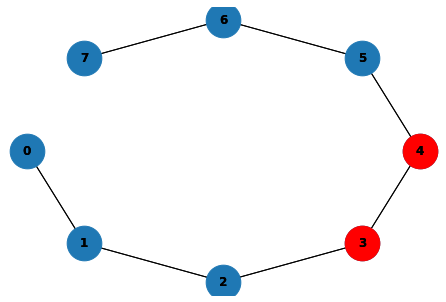

In [97]:
# obj2 = Graph.init_by_edges_list([(0,1),(0,2),(0,3),(1,2),(2,4)])
obj2 = Graph.init_by_edges_list([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7)])
# print(obj2.get_graph()) 
# draw_graph(obj2.get_graph())
init_DFS(obj2.get_graph(), 2)
draw_graph(obj2.get_graph(), obj2.find_medians())


[[0, 1, 0, 0], [1, 0, 0, 1], [0, 1, 0, 0], [1, 1, 0, 0]]
[1, 3]
3


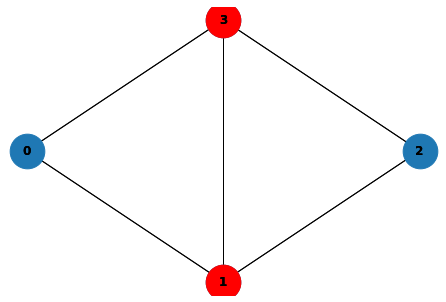

In [92]:
incendent_matrix = [
    [1,1,0,0,0],
    [1,0,1,1,0],
    [0,0,0,1,1],
    [0,1,1,0,1]
]
obj3 = Graph.init_by_incendent_matrix(incendent_matrix)
print(obj3.get_graph_by_incendent_matrix())
print(obj3.find_medians())
init_DFS(obj3.get_graph(), 2)
draw_graph(obj3.get_graph(), obj3.find_medians())

In [ ]:
# class Graph:
#     def __init__(self, matr: list):
#         self.graph = matr
        
#     @classmethod
#     def init_by_adjacency_list(cls, list1):
#         x = cls(list1)
#         return x
        
#     @classmethod
#     def init_by_adjacency_matrix(cls, matrix):
#         graph = [[]]
#         for i in range(len(matrix) - 1):
#             graph.append([])
#         for i in range(len(matrix)):
#             for j in range(len(matrix)):
#                 if matrix[i][j] == 1:
#                     graph[i].append(j)
                    
#         x = cls(graph)
#         return x
        
#     @classmethod
#     def init_by_incendent_matrix(cls, matrix):
#         graph = [[]]
#         for i in range(len(matrix) - 1):
#             graph.append([])
#         for i in range(len(matrix[0])):
#             cnt = []
#             for j in range(len(matrix)):
#                 if matrix[j][i] == 1:
#                      cnt.append(j)
#             graph[cnt.pop()].append(cnt.pop())
#         x = cls(graph)
#         return x
    
#     @classmethod
#     def init_by_edges_list(cls, list_pairs: list):
#         edges = 0
#         graph = []
#         for i in range(len(list_pairs)):
#             if list_pairs[i][0] > edges:
#                 edges = list_pairs[i][0]
#             if list_pairs[i][1] > edges:
#                 edges = list_pairs[i][1]
#         edges += 1
#         for i in range(edges):
#             graph.append([])
#         for i in range(len(list_pairs)):
#             graph[list_pairs[i][0]].append(list_pairs[i][1])
#         x = cls(graph)
#         return x
        
#     def add_arc(self, u: int, v: int):
#         self.graph[u].append(v)
        
#     def del_arc(self, start: int, end: int):
#         self.graph[u].pop(v)
    
#     def add_vertex(self):
#         self.graph.append(len(self.graph))
        
#     def del_vertex(self, vertex: int):
#         self.graph.pop(vertex)
        
#     def get_graph(self):
#         return self.graph
        
        
#     def __del__(self):
#         print("del")